# Housing Assignment

### Business Goal

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Importing Libraries and Filtering warnings

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 2. Reading and Inspecting Housing Dataset

### 2.1. Reading Dataset

Reading Housing dataset 'train.csv' and storing it in a dataframe. It contains a data set for the sale of houses in Australia.

In [3]:
# Reading 'train.csv' dataset.
Housing = pd.read_csv("train.csv")

In [4]:
# Setting display options for rows and columns.
pd.set_option('display.max_columns',250) # To display all columns
pd.set_option('display.max_rows',250) # To display rows
pd.set_option('display.width',1000) # To set display width

### 2.2. Inspecting Dataframe

Inspecting the dataframes for dimensions, null-values, and summary of different numeric columns.

In [5]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Checking the number of rows and columns in the dataframe
Housing.shape

(1460, 81)

In [7]:
# Checking the column-wise info of the dataframe
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Checking basic statistics of dataframe
Housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From above inspection we can observe below points:

* It has 1460 rows and 81 columns.
* Some rows have a lot of missing values and need to be handled.

## 3. Data Preparation for Housing dataframe

* Cleaning dataframe
* Handling outliers in dataframe

### 3.1. Cleaning Data

#### Handling NaN values in Categorical columns

In [9]:
# Checking null values in categorical columns
Housing.select_dtypes(include='object').isnull().sum()[Housing.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Replacing 'NA' with 'None' in the following columns below : 
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    Housing[col]=Housing[col].fillna('None')

#### Removing Skewed Categorical columns
 
* Let's remove any column that has one value repeating more than or equal to 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value.

In [11]:
# Function to get the column names that have count of one value more than 85%
def getHighCategoricalValueCounts():
    column = []
    categorical_columns = Housing.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(Housing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

In [12]:
columnsToBeRemoved = getHighCategoricalValueCounts()
columnsToBeRemoved

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [13]:
# Remove the columns with skewed data
Housing.drop(columnsToBeRemoved, axis = 1, inplace = True)
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000


In [14]:
Housing.select_dtypes(include='object').isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
FireplaceQu      0
GarageType       0
GarageFinish     0
Fence            0
SaleCondition    0
dtype: int64

#### OBSERVATION
No more null values in the categorical variables

#### Handling null values in Numerical columns

In [15]:
# Checking null values in numerical columns
Housing.select_dtypes(include=['int64','float']).isnull().sum()[Housing.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [16]:
# Impute null values of LotFrontage and MasVnrArea columns with their respective median values
Housing['LotFrontage'] = Housing['LotFrontage'].replace(np.nan, Housing['LotFrontage'].median())
Housing['MasVnrArea'] = Housing['MasVnrArea'].replace(np.nan, Housing['MasVnrArea'].median())

In [17]:
# Setting the null values with 0 for GarageYrBlt for now
Housing['GarageYrBlt'] = Housing['GarageYrBlt'].fillna(0)
Housing['GarageYrBlt'] = Housing['GarageYrBlt'].astype(int)

In [18]:
# Create a new column named IsRemodelled
# This column would determine whether the house has been remodelled or not based on the difference between remodelled and built years
def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
Housing['IsRemodelled'] = Housing.apply(checkForRemodel, axis=1)
Housing.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0


In [19]:
# Create a new column named BuiltOrRemodelledAge
# This column would determine the age of the building at the time of selling
def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
Housing['BuiltOrRemodelAge'] = Housing.apply(getBuiltOrRemodelAge, axis=1)
Housing.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0,8


In [20]:
# Create a new column OldOrNewGarage.
# This column will have values : Garage Yr Built < 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
Housing['OldOrNewGarage'] = Housing['GarageYrBlt'].apply(getGarageConstructionPeriod)
Housing.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0,8,1


In [21]:
# Dropping columns YearBuilt, YearRemodAdd, YrSold and GarageYrBlt as we will only be using derived columns
Housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### Removing Skewed Numerical columns
 
* Let's remove any column that has one value repeating more than or equal to 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value.

In [22]:
# Function to get the column names that have count of one value more than 85%
def getHighNumericalValueCounts():
    column = []
    numerical_columns = Housing.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(Housing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

In [23]:
columnsToBeRemoved = getHighNumericalValueCounts()
columnsToBeRemoved

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [24]:
# Removing Skewed columns
Housing.drop(columnsToBeRemoved, axis = 1, inplace = True)

# Dropping MoSold and Id as its not needed for analysis
Housing.drop(['MoSold','Id'], axis = 1, inplace = True)
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,None,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,None,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,None,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,None,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,None,Normal,250000,0,8,1


In [25]:
# Checking for percentage of null values in each column
percent_missing = round(100*(Housing.isnull().sum()/len(Housing.index)), 2)
print(percent_missing)

MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0
GarageArea           0.0


#### OBSERVATION
There are no null values in the dataset now.

#### Checking for Duplicates

In [26]:
Housing[Housing.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


#### OBSERVATION
No duplicates found in the data.

### 3.2. Checking for Outliers

In [27]:
# Checking for outliers at 25%,50%,75%,90%,95% and 99%
Housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


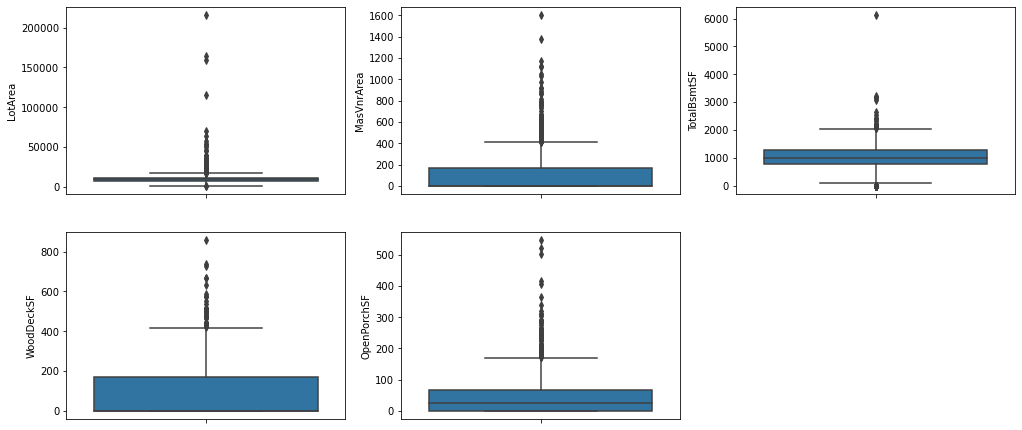

In [28]:
# Checking outliers in all the numeric columns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = Housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = Housing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = Housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = Housing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = Housing)
plt.show()

#### Removing Outliers

In [29]:
# Removing values beyond 98% for LotArea
nn_quartile_LotArea = Housing['LotArea'].quantile(0.98)
Housing = Housing[Housing["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea
nn_quartile_MasVnrArea = Housing['MasVnrArea'].quantile(0.98)
Housing = Housing[Housing["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF
nn_quartile_TotalBsmtSF = Housing['TotalBsmtSF'].quantile(0.99)
Housing = Housing[Housing["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF
nn_quartile_WoodDeckSF = Housing['WoodDeckSF'].quantile(0.99)
Housing = Housing[Housing["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF
nn_quartile_OpenPorchSF = Housing['OpenPorchSF'].quantile(0.99)
Housing = Housing[Housing["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [30]:
# Determine the percentage of data retained
num_data = round(100*(len(Housing)/1460),2)
print(num_data)

93.01


In [31]:
Housing.shape

(1358, 48)

## 4. Exploratory Data Analysis

<Figure size 720x360 with 0 Axes>

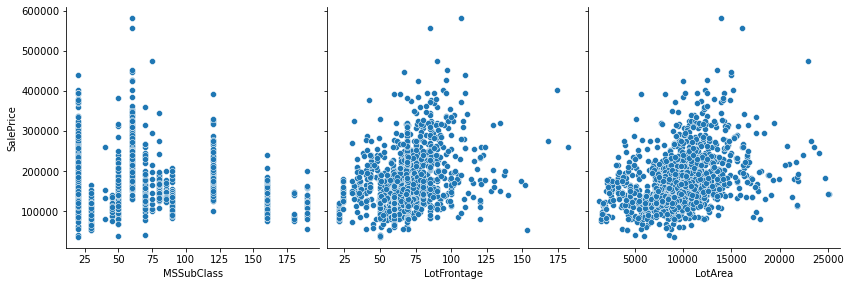

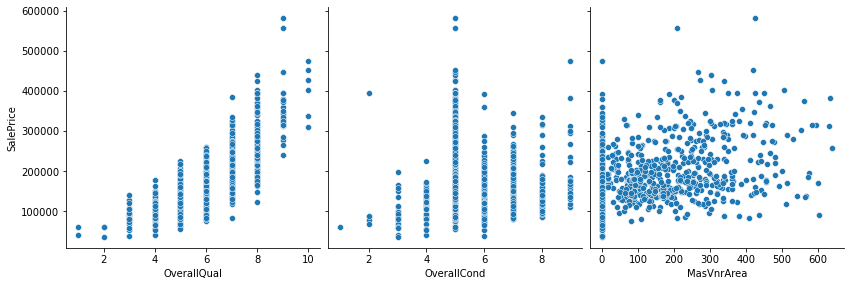

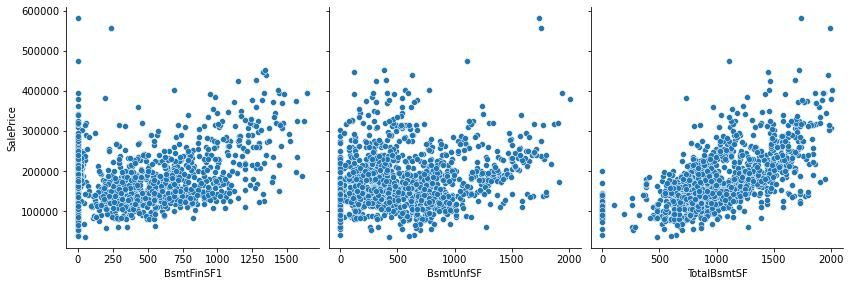

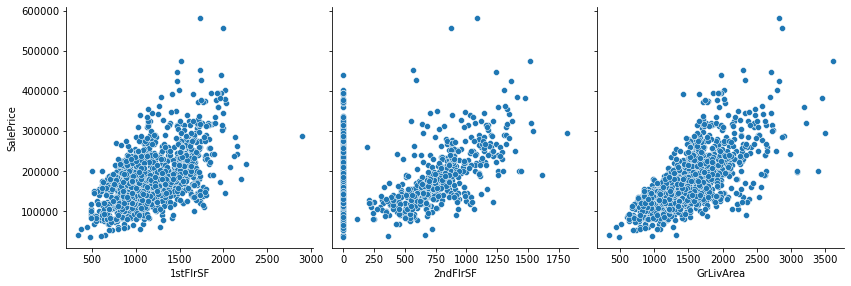

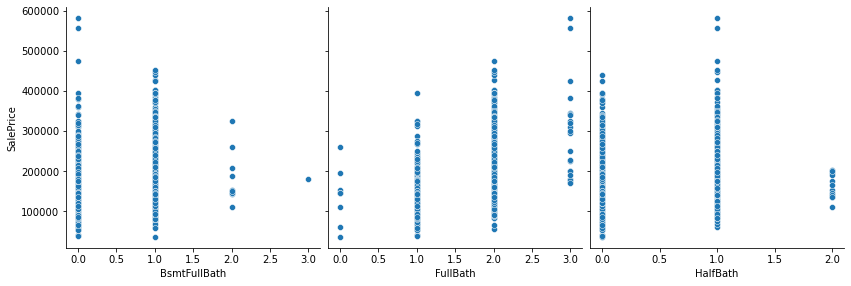

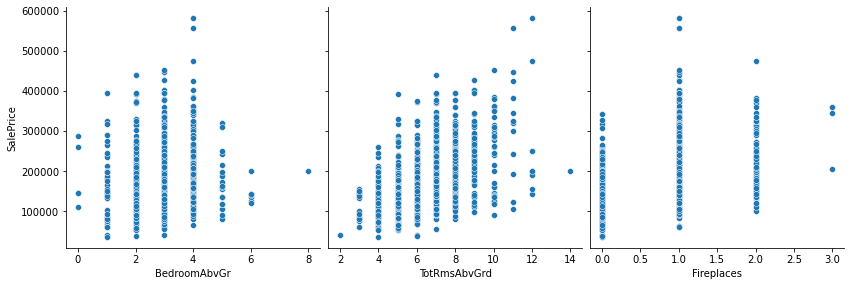

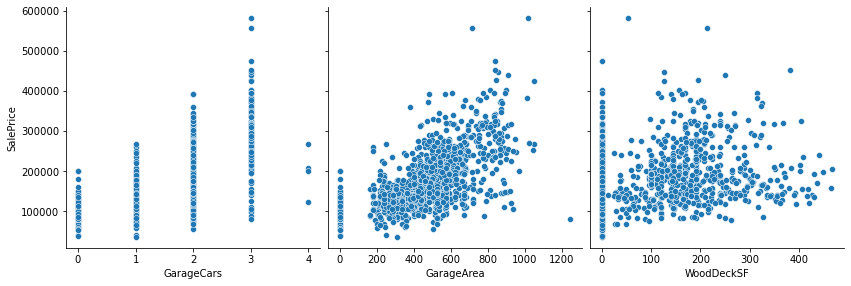

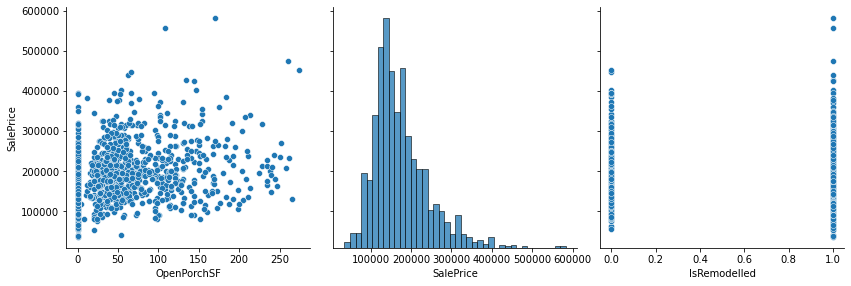

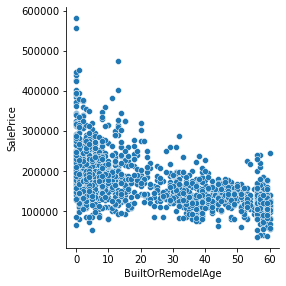

In [32]:
#Plotting scatter plot against Target Variable
plt.figure(figsize=(10,5))
sns.pairplot(Housing, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

#### OBSERVATION
* 1stFlrSF, GrLivArea seems to be showing correlation towards right.
* Other variables are too scattered and hence cannot be understood without further analysis.

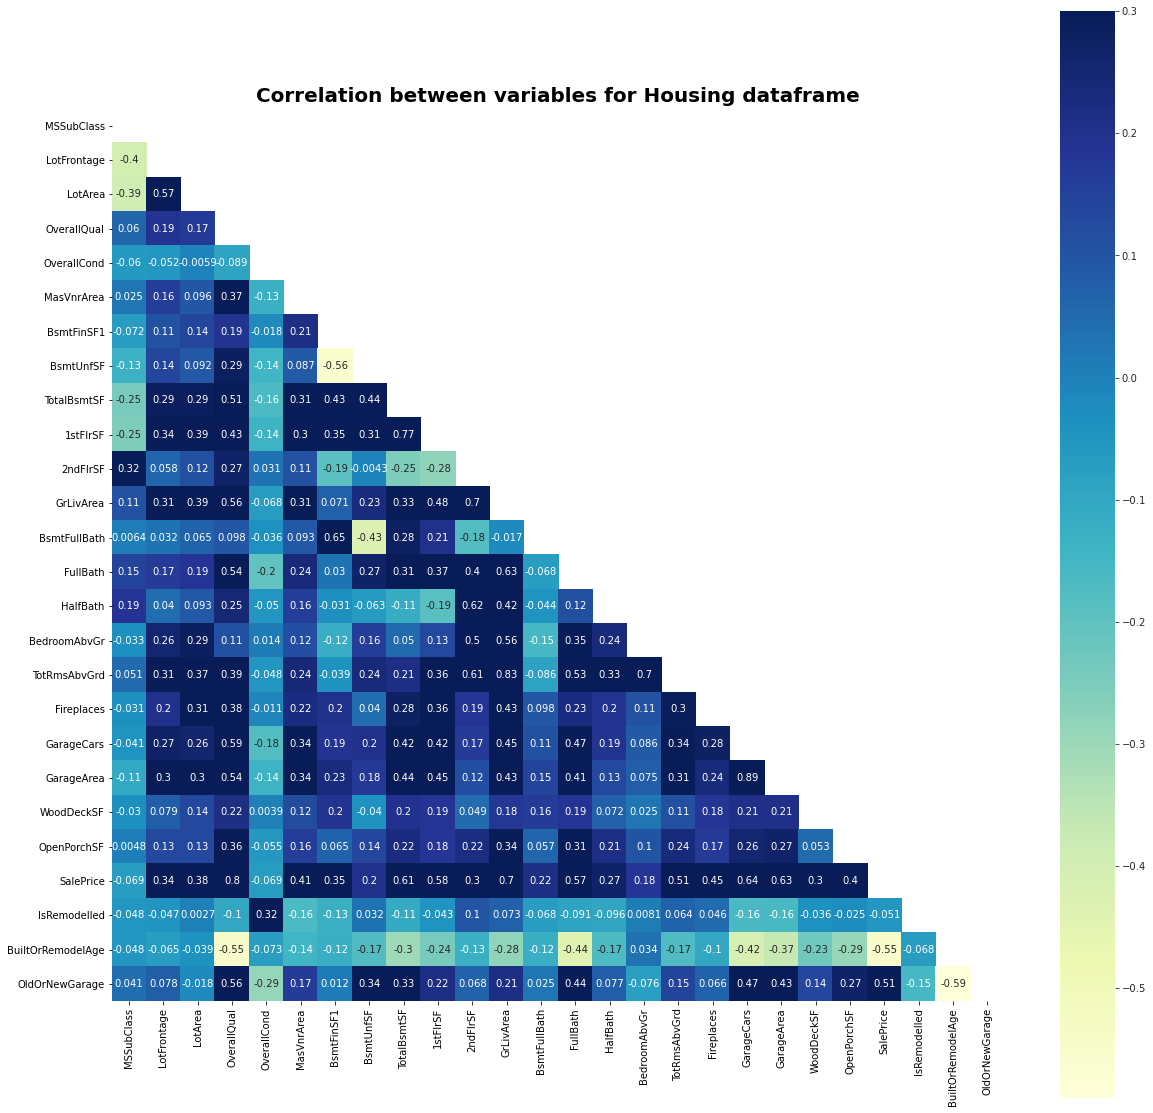

In [33]:
# Checking the correlation between columns
corr = Housing.corr(method = 'pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax=.3, cmap='YlGnBu', annot=True, mask=mask, square=True)
plt.title('Correlation between variables for Housing dataframe', fontsize=20, fontweight='bold')
plt.show()

#### OBSERVATION
* TotRmsAbvGrd and GrLivArea shows 82% correlation.
* Garage Area and Garage Cars shows 88% correlation.

From above observation we can say that columns are highly correlated. Hence,we'll be removing them.

In [34]:
# Dropping highly correlated variables
Housing.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [35]:
Housing.shape

(1358, 46)

## 5. Model Preparation

### 5.1. Creating dummies for categorical variables

#### Converting categorical columns to numerical columns
* Since the values of the below fields are ordered list, we will assign sequential values.
* For values which can be ordered, we have given an ordered sequence value
* For values which cannot be ordered, we have categorised them into 0 and 1

In [36]:
Housing['d_LotShape'] = Housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
Housing['d_ExterQual'] = Housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
Housing['d_BsmtQual'] = Housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing['d_BsmtExposure'] = Housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
Housing['d_BsmtFinType1'] = Housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
Housing['d_HeatingQC'] = Housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing['d_KitchenQual'] = Housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing['d_FireplaceQu'] = Housing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing['d_GarageFinish'] = Housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
Housing['d_BldgType'] = Housing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
Housing['d_HouseStyle'] = Housing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
Housing['d_Fence'] = Housing['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
Housing['d_LotConfig'] = Housing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
Housing['d_MasVnrType'] = Housing['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
Housing['d_SaleCondition'] = Housing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,Normal,208500,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,Normal,181500,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,Normal,223500,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,Abnorml,140000,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,Normal,250000,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [37]:
# Dropping original columns to avoid redundancy
Housing = Housing.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

Housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,208500,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,181500,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,223500,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,140000,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,250000,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [38]:
# Creating dummies for categorical variables
Housing = pd.get_dummies(data=Housing,columns=["MSZoning","Neighborhood","RoofStyle","Exterior1st","Exterior2nd",
                                               "Foundation","GarageType"],drop_first=True)
Housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,208500,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,181500,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,223500,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,140000,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,250000,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [39]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(2), int64(37), uint8(73)
memory usage: 521.2 KB


All columns in the data set are numeric now.

In [40]:
Housing.shape

(1358, 112)

### 5.2. Checking Target Variable


 mu = 173371.72 and sigma = 67852.48



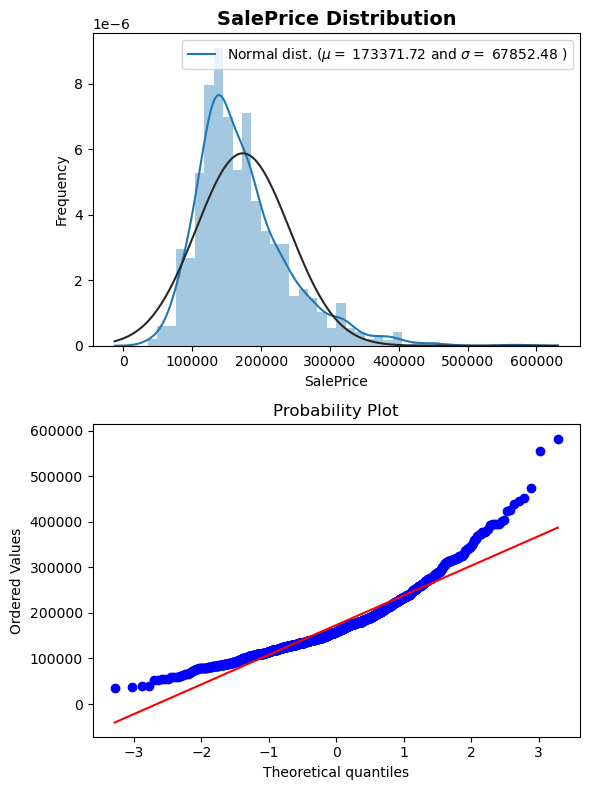

In [41]:
# Checking if the Target variable is normally distrbuted
plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(Housing['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Housing['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title('SalePrice Distribution', fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(Housing['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

#### OBSERVATION
From above plots we can observe that 'SalesPrice' is right skewed. Let's transform the Target Variable to make it normally distributed.

#### Transforming  Target Variable 'SalesPrice'

In [42]:
Housing['SalePrice']=np.log(Housing['SalePrice'])
Housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247694,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109011,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317167,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849398,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429216,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0



 mu = 11.99 and sigma = 0.37



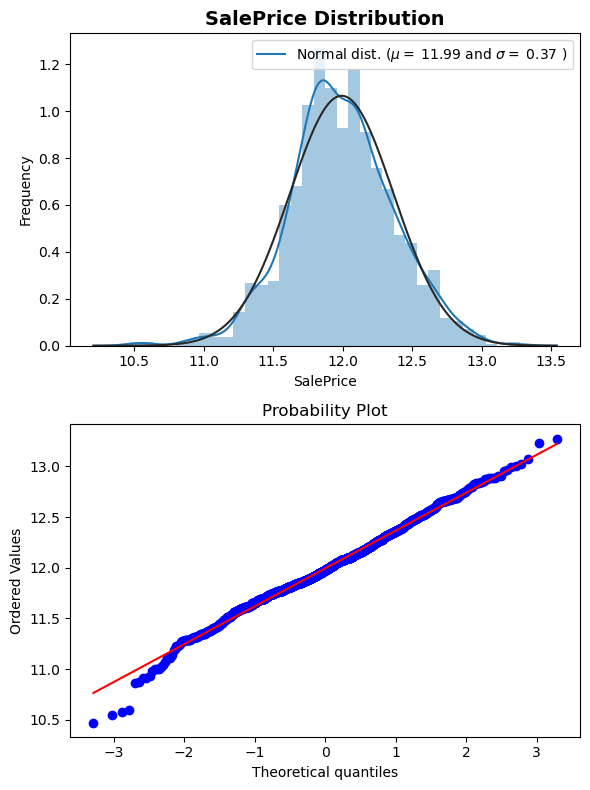

In [43]:
# Re-Checking if the Target variable is normally distrbuted
plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(Housing['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Housing['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title('SalePrice Distribution', fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(Housing['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

#### OBSERVATION
From above plots we can say that transformed target variable 'Sales' is now normally distributed. Let's drop the original column.

In [44]:
#Creating a copy of current dataframe for 'Question 3'
Housing1 = Housing.copy()

In [45]:
#Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(Housing):
    Housing_bi = Housing.copy()
    dualsvcol = (Housing_bi.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(Housing)
print(binary_cols)

['IsRemodelled', 'OldOrNewGarage', 'd_MasVnrType', 'd_SaleCondition', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', '

## 6. Model Building Preparation

### 6.1. Spliting data into Training and Test dataset

In [46]:
np.random.seed(0)
df_train, df_test = train_test_split(Housing, train_size=0.7, test_size = 0.3, random_state=100)

### 6.2. Scaling

In [47]:
#Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

#Dropping binary dummy variables for now. We'll concat them later to avoid hindering the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

#Scaling features using StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [48]:
print(df_train.shape)
print(df_test.shape)

(950, 112)
(408, 112)


In [49]:
#Storing target variable to y_train and y_test respectively
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [50]:
#Storing all feature variables to X_train and X_test and popping out target variable
x_train = df_train.drop('SalePrice',axis=1)
x_test = df_test.drop('SalePrice',axis=1)

In [51]:
#Inspecting stats for Training set after scaling
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,BuiltOrRemodelAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,IsRemodelled,OldOrNewGarage,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
count,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,-7.315785e-17,-1.107082e-16,-1.405893e-16,-2.189111e-16,7.829994e-17,-4.441476e-16,-1.151710e-16,-1.412458e-16,-1.138855e-16,8.870098e-17,-9.162262e-17,2.110081e-16,1.264486e-16,3.578424e-16,-1.916596e-17,6.334699e-16,1.206053e-16,-9.816709e-18,-1.738960e-16,-2.839834e-17,1.173330e-16,1.065814e-16,-5.177145e-16,-4.539059e-16,1.107886e-16,-8.428930e-17,3.300284e-16,-1.823103e-17,-2.430804e-17,2.305758e-16,2.708944e-16,-3.552714e-17,-1.589372e-17,-1.477181e-16,0.452632,0.286316,0.398947,0.915789,0.045263,0.012632,0.790526,0.145263,0.002105,0.010526,0.034737,0.011579,0.104211,0.036842,0.064211,0.065263,0.026316,0.010526,0.031579,0.165263,0.007368,0.055789,0.013684,0.048421,0.078947,0.014737,0.054737,0.037895,0.063158,0.015789,0.025263,0.007368,0.804211,0.007368,0.175789,0.006316,0.002105,0.001053,0.001053,0.027368,0.001053,0.038947,0.146316,0.001053

In [52]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,BuiltOrRemodelAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,IsRemodelled,OldOrNewGarage,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
28,-0.870436,-1.134517,1.924938,-0.784505,0.400140,-0.632903,2.140759,-0.836005,1.237067,1.380359,-0.799609,0.299871,1.183427,-1.037659,-0.742371,-1.053583,2.253273,-0.984557,1.899039,3.841352,-0.668463,-1.085715,-0.671614,-0.52516,2.425529,0.233814,-1.199396,-0.769721,1.230043,0.343045,-0.432563,-0.842006,-0.472539,-2.220595,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
347,-0.870436,-0.002113,2.281275,-0.031697,-0.507099,-0.410566,2.123519,-0.833678,1.221149,1.023565,-0.799609,0.028366,1.183427,0.829341,-0.742371,0.202256,2.253273,0.363179,-0.775925,-0.042514,1.268373,-1.085715,-0.671614,-0.52516,-0.555393,0.233814,0.891295,-0.769721,1.230043,-0.784612,-0.432563,-0.842006,-0.472539,0.524448,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
873,-0.400932,-0.465369,0.761202,-0.784505,1.307378,-0.632903,-0.080773,-0.254102,-0.492651,-0.269082,-0.799609,-0.438978,-0.802891,-1.037659,-0.742371,0.202256,0.654610,-0.984557,-0.775925,-0.256305,1.752582,0.698764,1.110602,-0.52516,-0.555393,-0.237785,-0.154051,-0.769721,1.230043,-0.784612,-0.432563,-0.842006,-0.472539,0.524448,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
951,-0.870436,-0.465369,-0.449062,-0.784505,-0.507099,-0.632903,0.574358,-0.882558,-0.503263,-0.476725,-0.799609,-1.113289,1.183427,-1.037659,-0.742371,0.202256,-0.944053,-0.984557,3.134352,-0.755150,0.881006,0.698764,-0.671614,-0.52516,-0.555393,0.233814,-0.154051,-0.769721,-0.990462,-0.784612,-0.432563,-0.842006,1.341247,-0.848074,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1273,0.538077,2.828898,0.585123,-0.031697,1.307378,-0.010360,0.766463,-0.619537,0.003449,0.669695,-0.799609,-0.240913,1.183427,-1.037659,-0.742371,-1.053583,0.654610,-0.984557,-0.775925,-0.755150,-1.007410,-1.085715,-

### 6.3. Eliminating columns using RFE and Automated approach

In [53]:
x_train.shape

(950, 111)

Since there are around 111 features, we will use RFE to get the best 50 features out of the 111 features and then use shortlisted features for further analysis.

In [54]:
# Building a Linear Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(x_train, y_train)

#Cut down number of features to 50
rfe = RFE(lm, 50)            
rfe = rfe.fit(x_train, y_train)

In [55]:
#Columns selected by RFE
col = x_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them
temp_df = pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtUnfSF,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,GarageCars,True,1
7,BuiltOrRemodelAge,True,1
8,OldOrNewGarage,True,1
9,d_SaleCondition,True,1


In [56]:
# Assign the 50 columns to X_train_rfe
x_train_rfe = x_train[col]

In [57]:
# Associate the new 50 columns to X_train and X_test for further analysis
x_train = x_train_rfe[x_train_rfe.columns]
x_test =  x_test[x_train.columns]

In [58]:
print(x_train.shape)
print(x_test.shape)

(950, 50)
(408, 50)


## 7. Building Model

### 7.1. Building Ridge Model

Building model with the optimal value of alpha using GridSearchCV

In [59]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [60]:
# Building Ridge Model
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Displaying mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,2.0,-0.208717,-0.220520,1
12,1.0,-0.207763,-0.220624,2
11,0.9,-0.207636,-0.220643,3
10,0.8,-0.207500,-0.220668,4
9,0.7,-0.207354,-0.220700,5
14,3.0,-0.209429,-0.220742,6
8,0.6,-0.207197,-0.220745,7
7,0.5,-0.207029,-0.220806,8
6,0.4,-0.206863,-0.220871,9
15,4.0,-0.210073,-0.220958,10


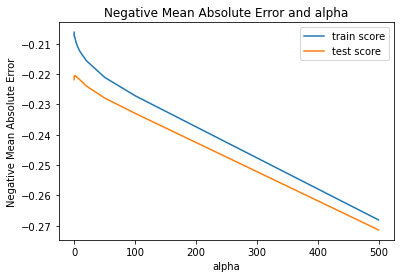

In [62]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
# The best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [64]:
# check the coefficient values with lambda = 2.0
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.7570977668707587
Coefficients:
 [ 0.0822631   0.25396055  0.10705499 -0.12414162  0.22472327  0.28508912
  0.11985626 -0.08386159  0.14217753  0.16861433  0.42789974  0.12982432
  0.31344423  0.17816012 -0.1332332   0.22613074 -0.14189616 -0.18884542
 -0.31853526 -0.11034576  0.16411367  0.23511217 -0.26756425 -0.07094911
  0.18264826  0.05581001  0.11762736  0.05245471  0.08367264 -0.04362486
  0.0503573   0.15802899 -0.04724348 -0.08910733  0.16078829 -0.21089288
 -0.16263247 -0.04946074  0.10061584  0.0399043  -0.17804459  0.17262964
  0.05075652 -0.1237333   0.182094    0.1257998   0.22016848  0.15877769
  0.28597926  0.10948784]


#### Model Evaluation and Prediction Metrics

In [65]:
y_pred_train_r = ridge.predict(x_train)
y_pred_test_r = ridge.predict(x_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=2.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=2.0):
 ****************************************

For Train Set:
R2 score: 0.9140467590425583 
MSE score: 0.08595324095744175 
MAE score: 0.20937283256494246 
RMSE score: 0.2931778316268844

For Test Set:
R2 score: 0.8826471455614764 
MSE score: 0.12629084639949664 
MAE score: 0.25496240157816685 
RMSE score: 0.35537423429322595 
 ****************************************


In [66]:
#Put the Features and coefficient in a dataframe
ridge_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

#Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  
ridge_df

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,MSZoning_FV,0.4279,0.4279
1,Neighborhood_MeadowV,-0.3185,0.3185
2,MSZoning_RL,0.3134,0.3134
3,GarageType_BuiltIn,0.2860,0.2860
4,GrLivArea,0.2851,0.2851
5,Neighborhood_OldTown,-0.2676,0.2676
6,OverallQual,0.2540,0.2540
7,Neighborhood_NridgHt,0.2351,0.2351
8,Neighborhood_Crawfor,0.2261,0.2261
9,TotalBsmtSF,0.2247,0.2247


In [67]:
# Doing an RFE to minimise the features to 15
X_train_ridge = x_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

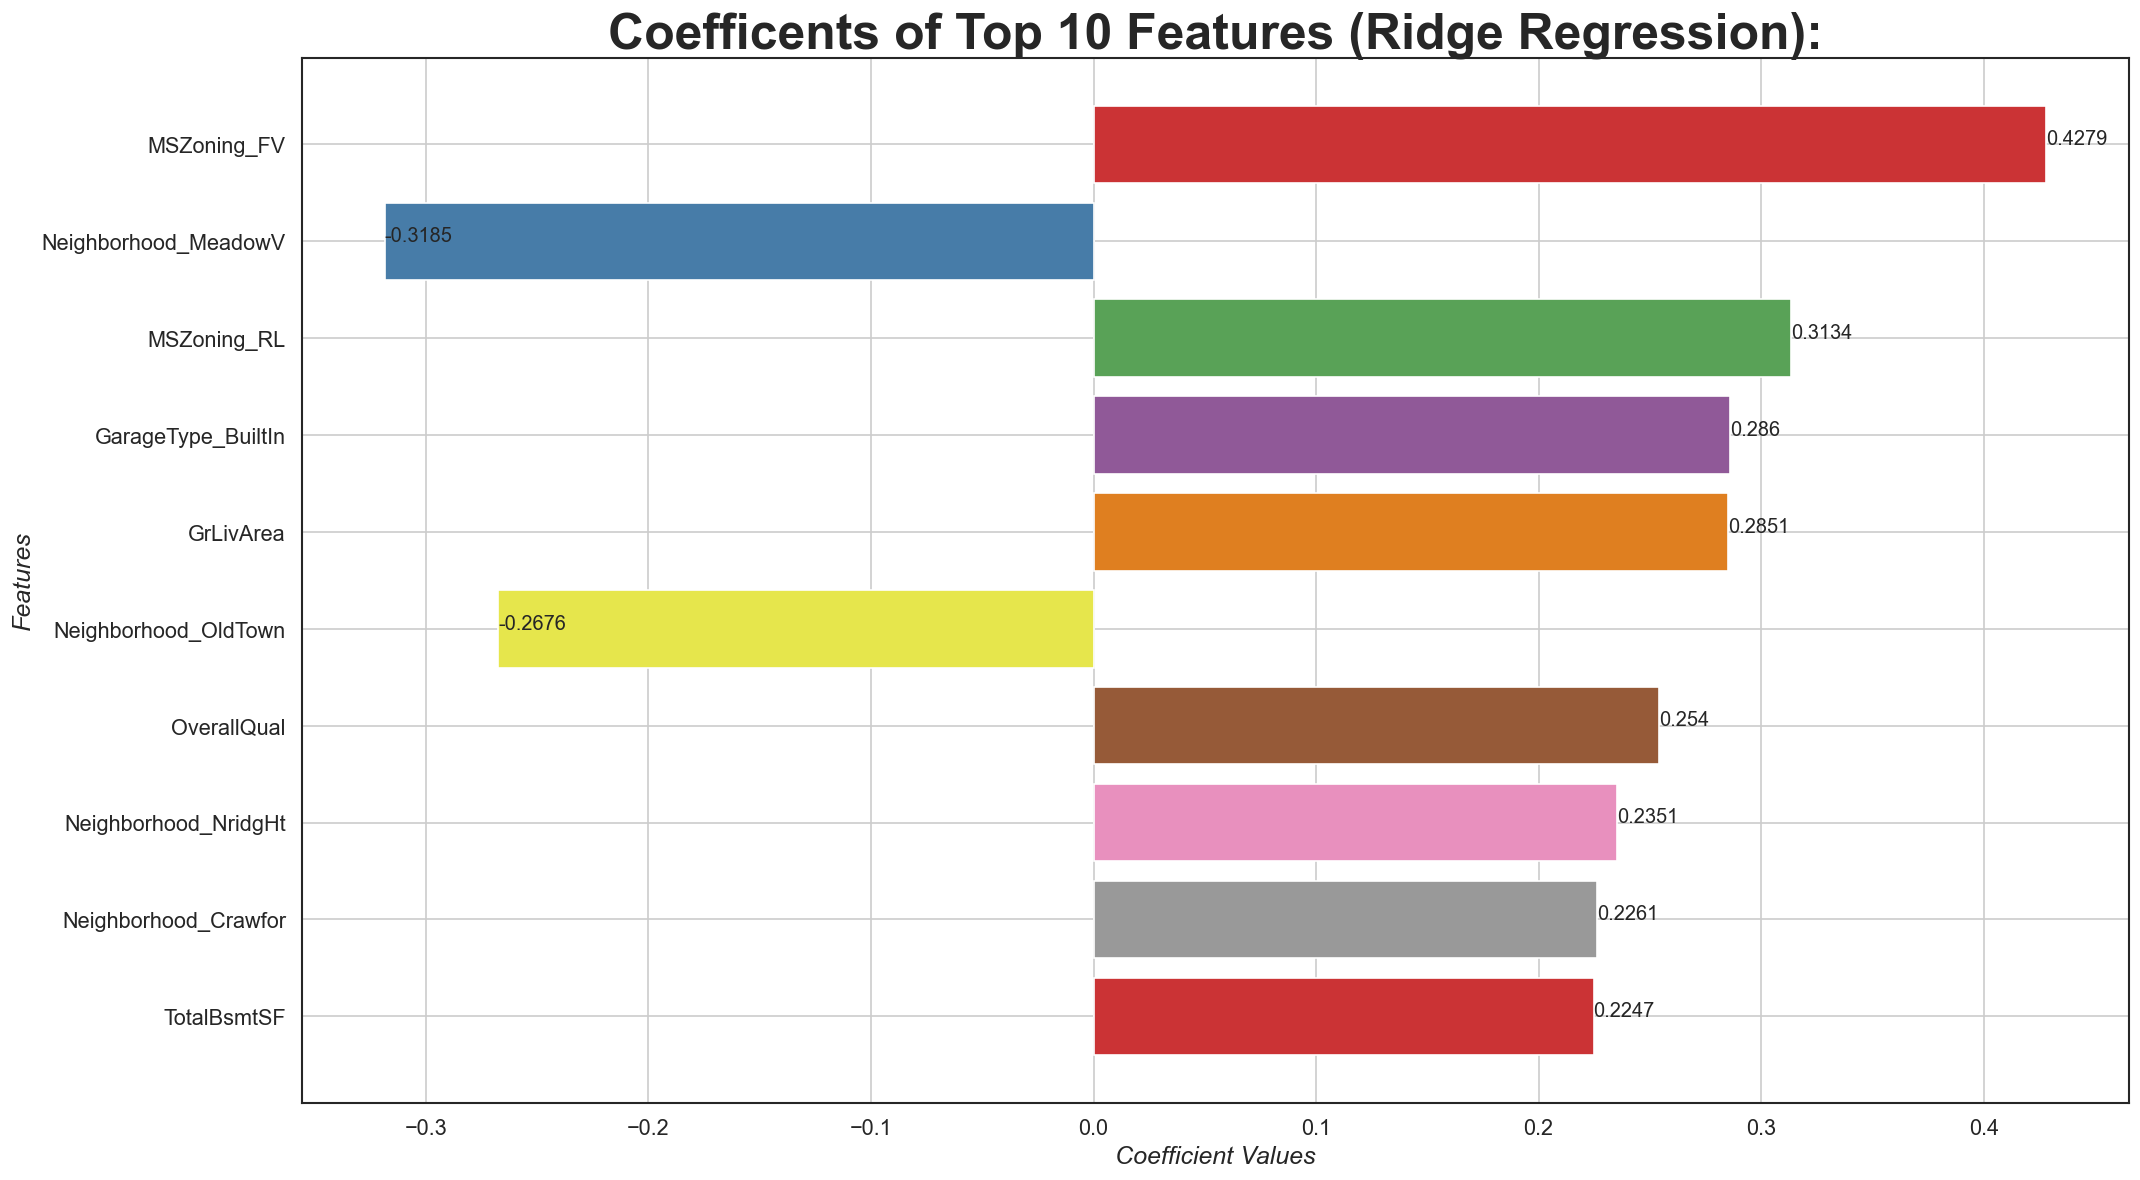

In [68]:
# Assign top 10 features to a temp dataframe for further display in the bar plot
top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(18,10), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 15, fontstyle='italic')
plt.ylabel('Features' , fontsize= 15, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=30,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=12)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

#### OBSERVATION
The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

### Residual Analysis of Ridge Model

#### 1. For Train Set
Checking for the error terms distribution.

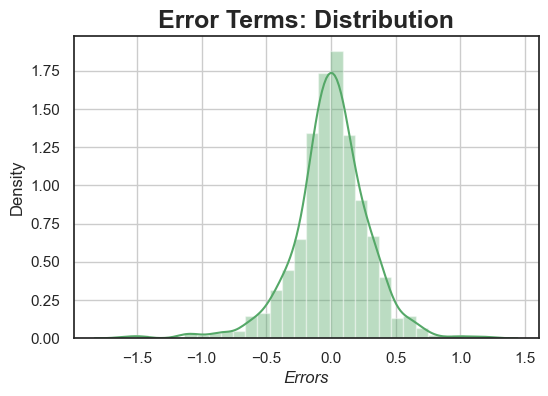

In [69]:
#Residuals
res = (y_train - y_pred_train_r)  
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(dpi=100)
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

#### OBSERVATION
From above graph we can say that Error terms are approximately normally distributed.

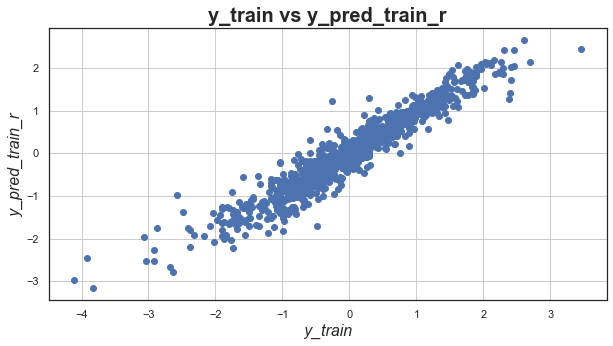

In [70]:
# Plotting y_train and y_train_pred to understand the residuals in train set
sns.set_style('white')
plt.figure(figsize = (10,5))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [71]:
y_train.shape

(950,)

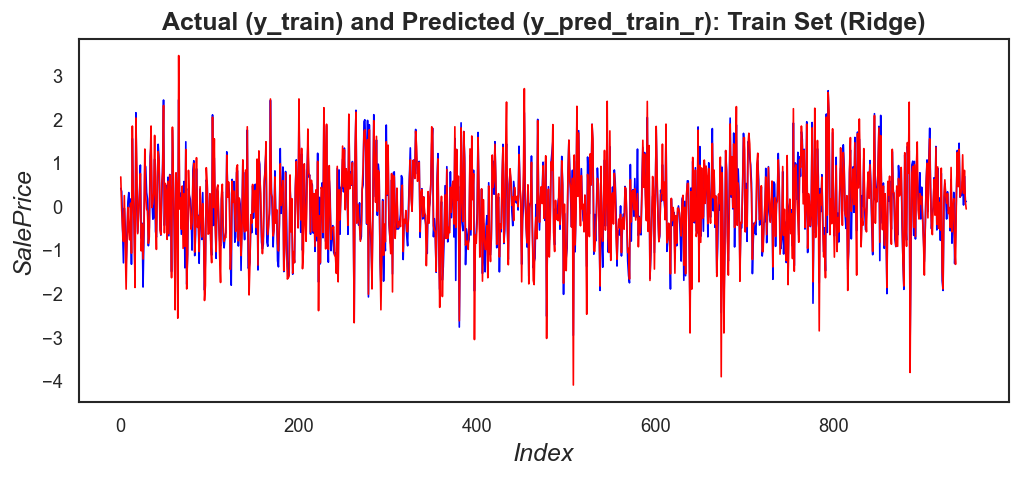

In [72]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f = [i for i in range(0,950,1)] #Since y_train has 950 observations
g = [i for i in range(0,950,1)]
plt.plot(f, y_pred_train_r, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_r' plot
plt.plot(g, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_r): Train Set (Ridge)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

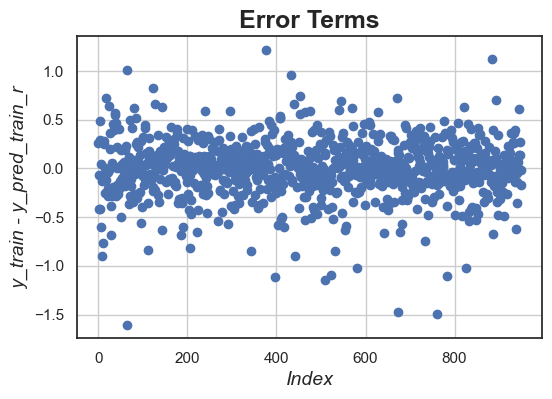

In [73]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,950,1)] #For 950 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j, res_train)
plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

#### OBSERVATION
From above graph we can say that residuals for train sets are scattered along 'y=0' and are independent of each other.

#### 2. For Test Set
Checking for the error terms distribution.

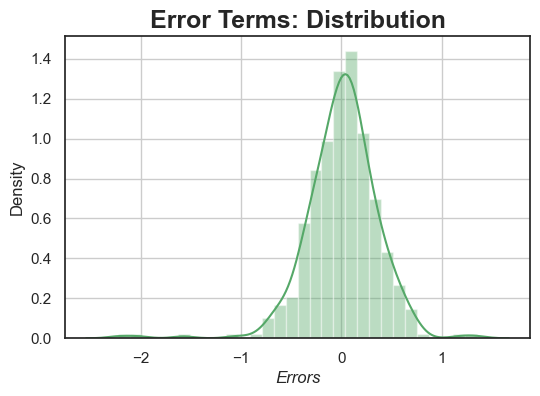

In [74]:
#Residuals
res = (y_test - y_pred_test_r)  
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(dpi=100)
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

#### OBSERVATION
From above graph we can say that Error terms are approximately normally distributed.

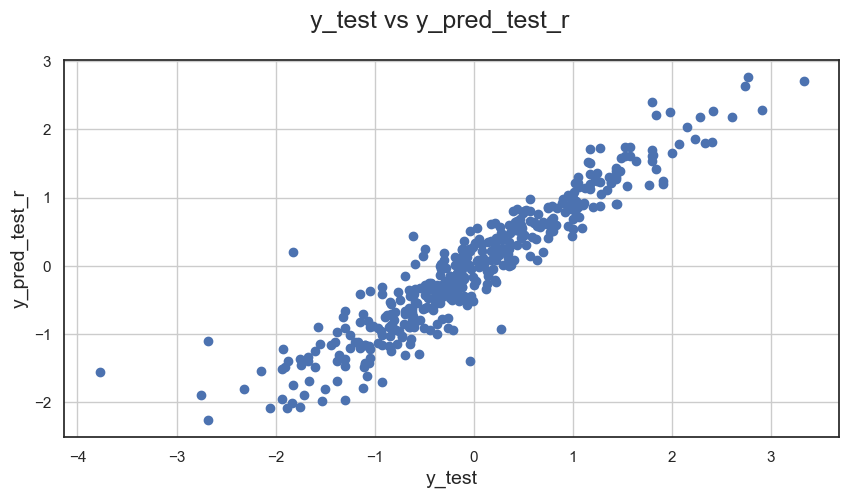

In [75]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(10,5), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

In [76]:
y_test.shape

(408,)

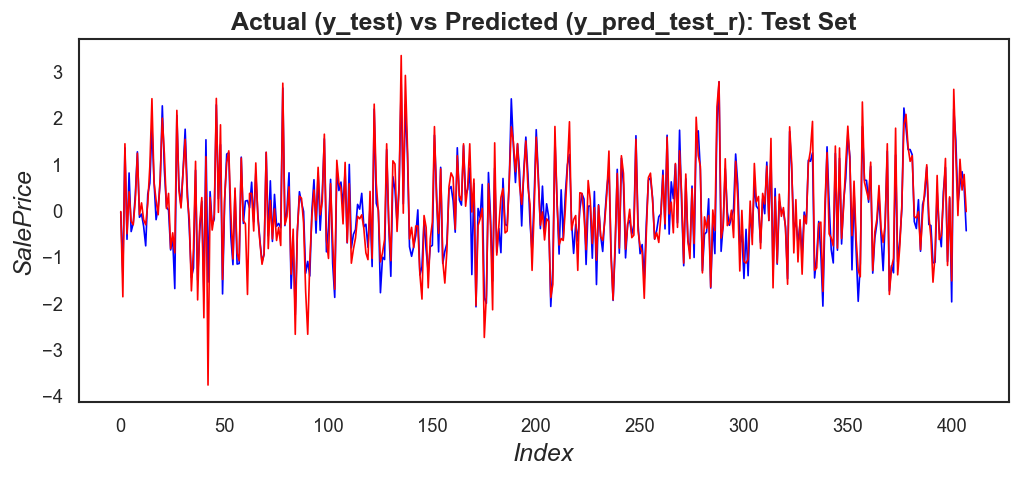

In [77]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p = [i for i in range(0,408,1)] #As test set has 408 observations
l = [i for i in range(0,408,1)]
plt.plot(p, y_pred_test_r, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_r' plot(test pred)
plt.plot(l, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_r): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

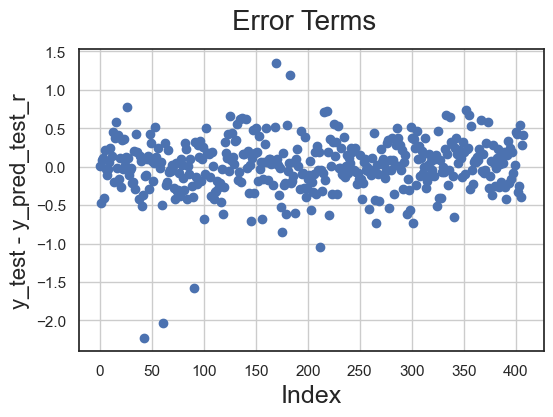

In [78]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,408,1)] #For 408 observations in the test set
res_test = (y_test-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

#### OBSERVATION
From above graph we can say that residuals are scattered along 'y=0' and are independent of each other.

### 7.2. Building Lasso Model

In [79]:
lasso = Lasso()

# list of alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Displaying the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.207207,-0.221312,1
0,0.0001,-0.206610,-0.221398,2
2,0.0003,-0.207800,-0.221563,3
3,0.0004,-0.208421,-0.221701,4
4,0.0005,-0.209038,-0.222164,5
5,0.001,-0.212045,-0.223054,6
6,0.002,-0.215609,-0.224708,7
7,0.003,-0.217970,-0.226418,8
8,0.004,-0.220279,-0.228051,9
9,0.005,-0.223220,-0.230426,10


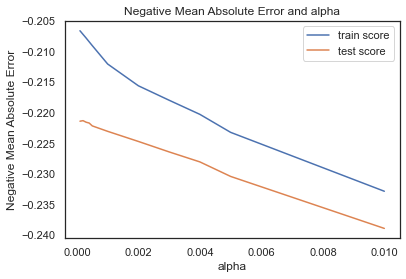

In [81]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [82]:
# The best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [83]:
# check the coefficient values with lambda = 0.0002
alpha = 0.0002
lasso = Lasso(alpha=alpha)     
lasso.fit(x_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercept:  -1.0888329204415068
Coefficients:
 [ 0.08256871  0.24512473  0.10325094 -0.12275226  0.2240582   0.28446219
  0.1201355  -0.08436563  0.13952308  0.15646975  0.79667488  0.47999532
  0.65799631  0.52173107 -0.1438791   0.23250847 -0.14931108 -0.12637011
 -0.38851876 -0.11294579  0.18405895  0.25494308 -0.26889654 -0.07493933
  0.20784721  0.03634146  0.11424664  0.03651107  0.06381386 -0.0135203
  0.          0.15519797 -0.         -0.08243504  0.22013802 -0.25565787
 -0.17191737 -0.          0.06789393  0.         -0.24253788  0.21855371
  0.0570212  -0.12543464  0.1791646   0.28757927  0.23970946  0.21346176
  0.31591309  0.12416401]


In [84]:
#Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(x_train)
y_pred_test_l = lasso.predict(x_test)

#R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

#Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

#Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

#Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.002):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.002):
 ****************************************

For Train Set:
R2 score: 0.9153651941577272 
MSE score: 0.08463480584227281 
MAE score: 0.20832015672340426 
RMSE score: 0.29092061776758416

For Test Set:
R2 score: 0.8834784025370518 
MSE score: 0.12539627806945317 
MAE score: 0.2553770268160431 
RMSE score: 0.3541133689504721 
 ****************************************


In [85]:
#Creating a dataframe of features and coefficients
lasso_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
#Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  
lasso_df

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,MSZoning_FV,0.7967,0.7967
1,MSZoning_RL,0.6580,0.6580
2,MSZoning_RM,0.5217,0.5217
3,MSZoning_RH,0.4800,0.4800
4,Neighborhood_MeadowV,-0.3885,0.3885
5,GarageType_BuiltIn,0.3159,0.3159
6,Foundation_Stone,0.2876,0.2876
7,GrLivArea,0.2845,0.2845
8,Neighborhood_OldTown,-0.2689,0.2689
9,Exterior1st_VinylSd,-0.2557,0.2557


In [86]:
# Performing RFE to minimise the features to 15
X_train_lasso = x_train[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

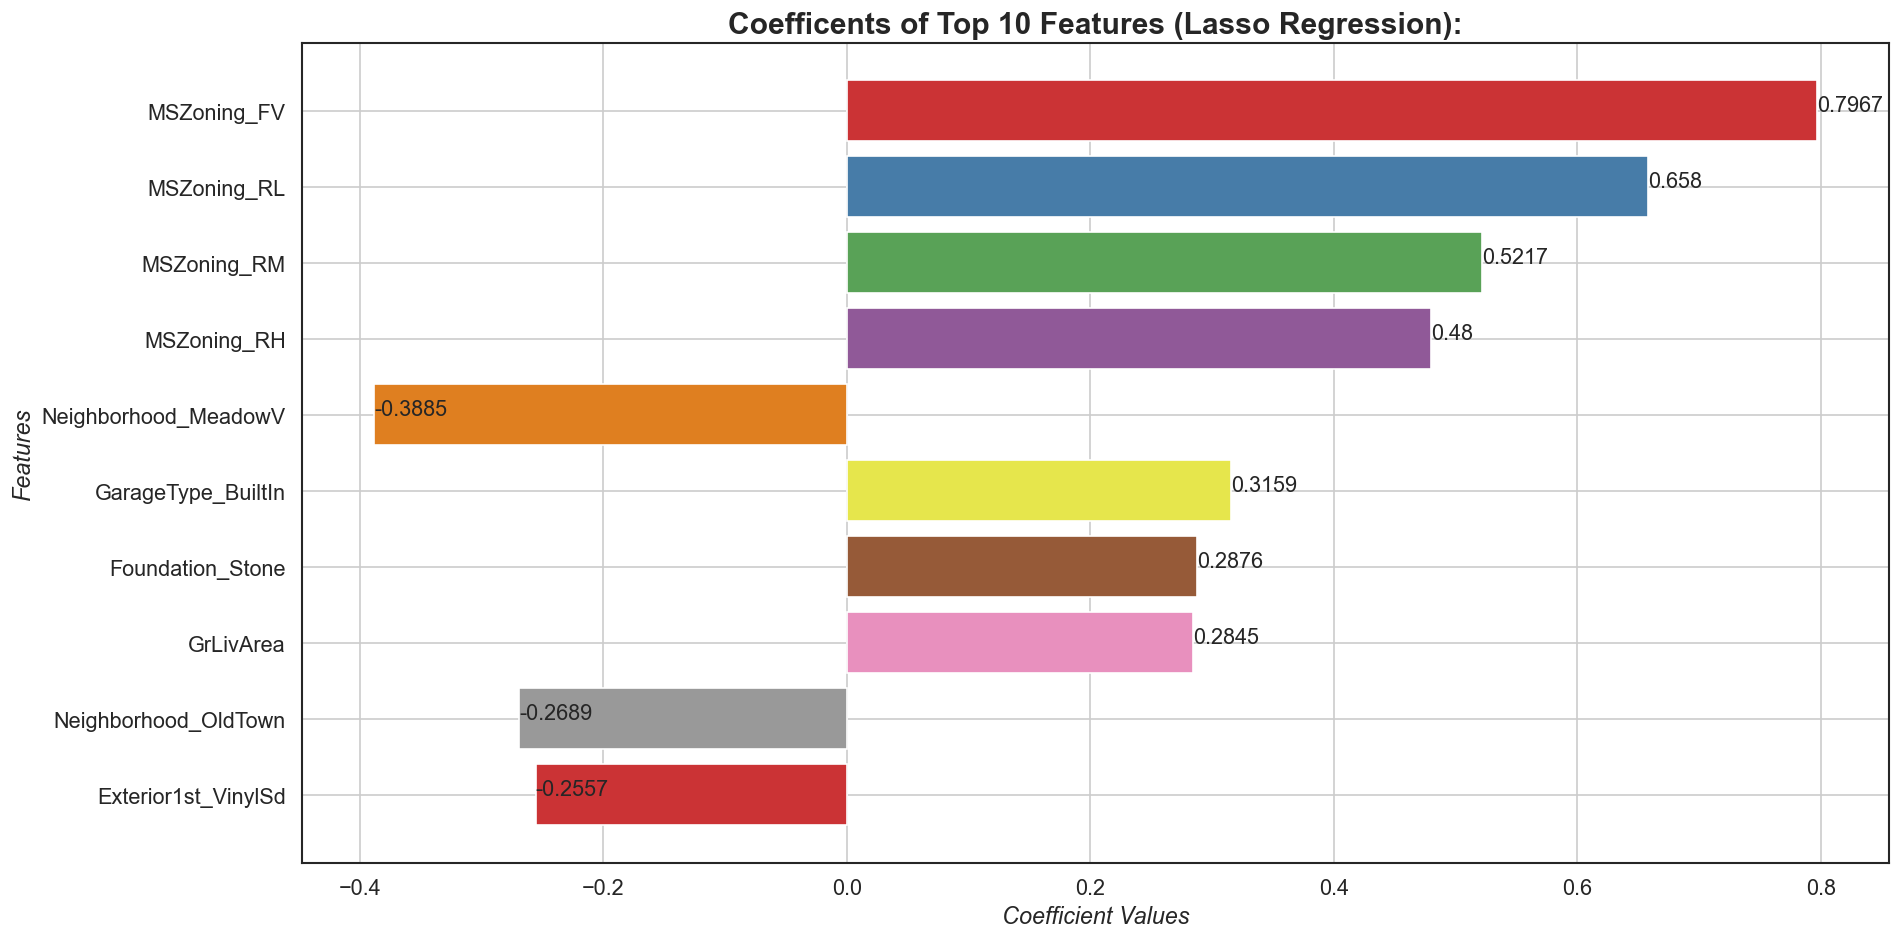

In [87]:
# Assign top 10 features to a temp dataframe for further display in the bar plot
top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

#### OBSERVATION
The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

In [88]:
#Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_org_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_org_lasso_features

['MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_RH',
 'Neighborhood_MeadowV']

### Residual Analysis of Lasso Model

#### 1. For Train Set
Checking for the error terms distribution.

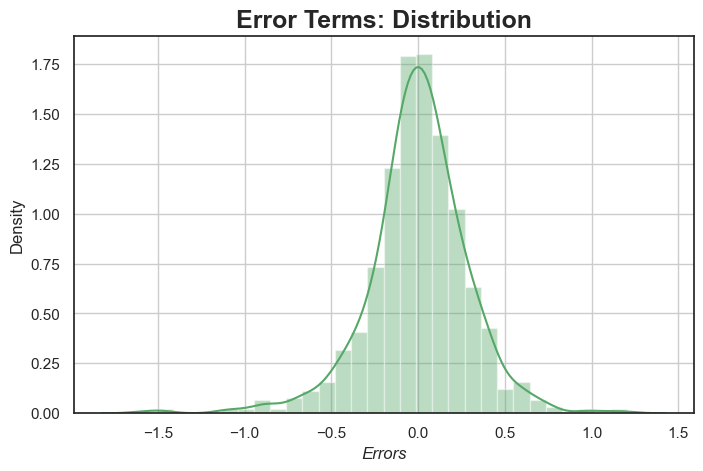

In [89]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(8,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

#### OBSERVATION
From above graph we can say that Error terms are approximately normally distributed.

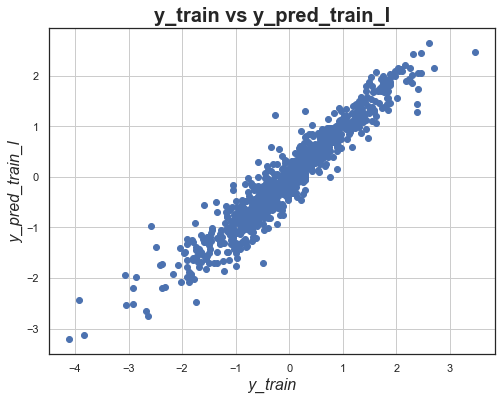

In [90]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [91]:
y_train.shape

(950,)

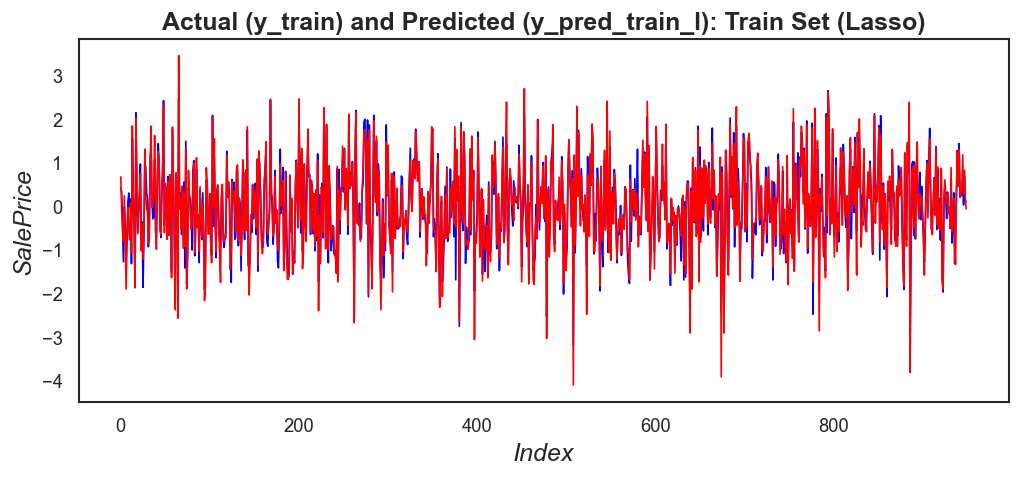

In [92]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f1 = [i for i in range(0,950,1)] #Since y_train has 950 observations
g1 = [i for i in range(0,950,1)]
plt.plot(f1, y_pred_train_l, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_l' plot
plt.plot(g1, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_l): Train Set (Lasso)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

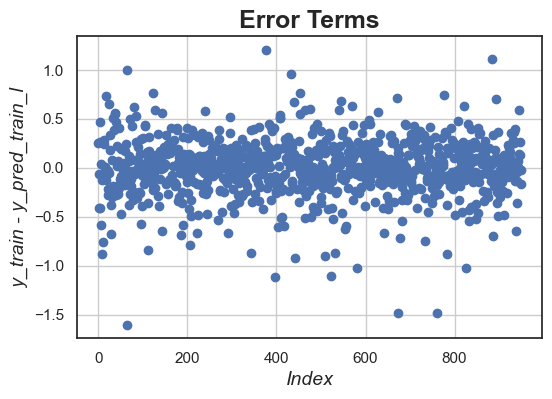

In [93]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,950,1)] #For 950 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)
plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

#### OBSERVATION
From above graph we can say that residuals for train sets are scattered along 'y=0' and are independent of each other.

#### 2. For Test Set

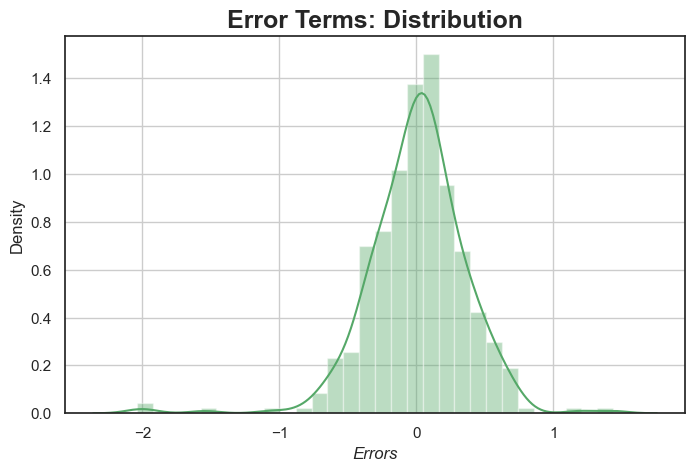

In [94]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(8,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

#### OBSERVATION
From above graph we can say that Error terms are approximately normally distributed.

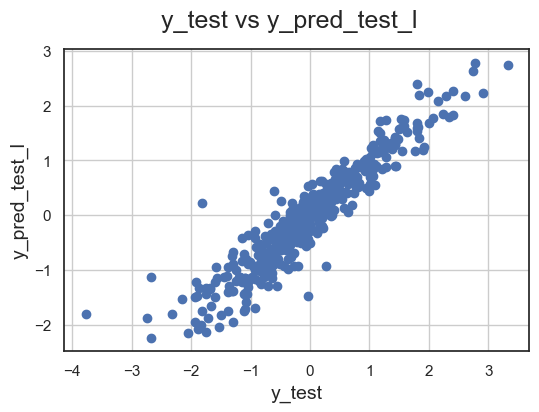

In [95]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()

In [96]:
y_test.shape

(408,)

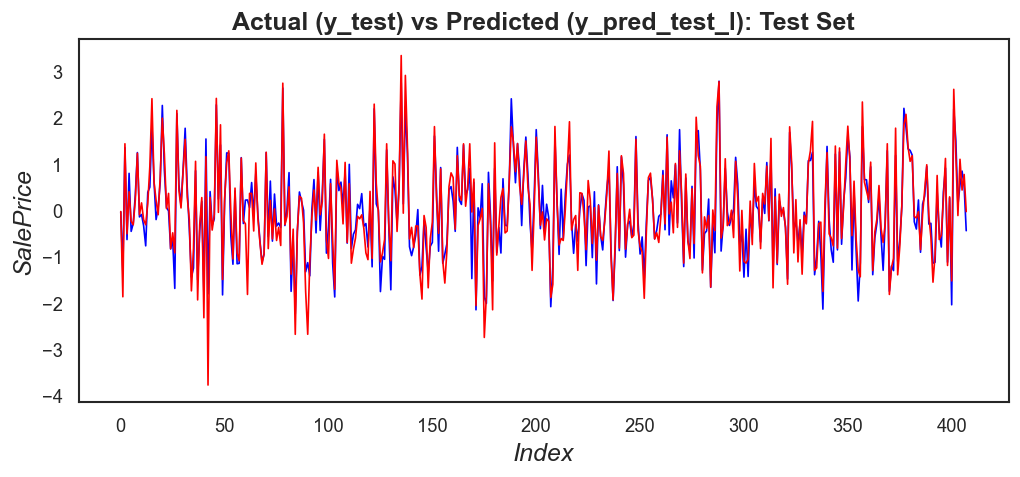

In [97]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p2 = [i for i in range(0,408,1)] #As test set has 408 observations
l2 = [i for i in range(0,408,1)]
plt.plot(p2, y_pred_test_l, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_l' plot(test pred)
plt.plot(l2, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_l): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

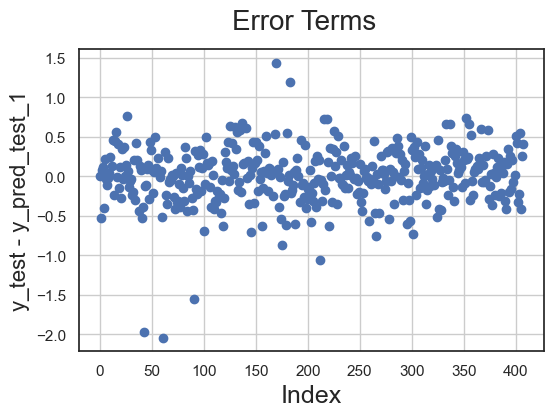

In [98]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,408,1)] #For 408 observations in the test set
res_test1 = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

#### OBSERVATION
From above graph we can say that residuals for train sets are scattered along 'y=0' and are independent of each other.

## 8. Subjective Questions

#### Question1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [99]:
#Optimal Value of alpha for ridge and lasso regression (importing values already computed above)
optimal_alpha_ridge = 2.0      #(Computed Above: For Ridge Regression)
optimal_alpha_lasso = 0.002    #(Computed Above: For Lasso Regression)

#### Changes in the model when we double the value of alpha for both ridge and lasso regression

#### Ridge Regression Model

In [100]:
# From above cell we know that optimal_alpha=2 new_alpha=optimal_alpha*2=4
ridge = Ridge(alpha=4)
ridge.fit(x_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.6139786412015377
Coefficients:
 [ 0.08130526  0.2608205   0.10900965 -0.12454157  0.22442536  0.28535155
  0.12389649 -0.08396256  0.14340927  0.17045389  0.31618421  0.04122661
  0.21801756  0.06736137 -0.1003093   0.21599752 -0.13058282 -0.17913912
 -0.24331818 -0.10173342  0.13493137  0.21369921 -0.24991842 -0.06464533
  0.15767176  0.03023565  0.07792765  0.02671077  0.04982094 -0.03563412
  0.0263065   0.15379795 -0.02495806 -0.05035961  0.11501919 -0.16454781
 -0.14645776 -0.03077324  0.06486291  0.01666637 -0.13047846  0.126439
  0.03755029 -0.11874992  0.1817724   0.07148396  0.19493031  0.11453163
  0.24900804  0.08631466]


In [101]:
#Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(x_train)
y_pred_test_r = ridge.predict(x_test)

#R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

#Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

#Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

#Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha=2*2=4):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha=2*2=4):
 ****************************************

For Train Set:
R2 score: 0.912770435968376 
MSE score: 0.08722956403162396 
MAE score: 0.21047879547179743 
RMSE score: 0.295346515184493

For Test Set:
R2 score: 0.8832293629028906 
MSE score: 0.12566428540796842 
MAE score: 0.2538515727298641 
RMSE score: 0.35449158721748025 
 ****************************************


In [102]:
#Creating a dataframe of features and coefficients
ridge_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

#Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,MSZoning_FV,0.3162,0.3162
1,GrLivArea,0.2854,0.2854
2,OverallQual,0.2608,0.2608
3,Neighborhood_OldTown,-0.2499,0.2499
4,GarageType_BuiltIn,0.2490,0.2490
5,Neighborhood_MeadowV,-0.2433,0.2433
6,TotalBsmtSF,0.2244,0.2244
7,MSZoning_RL,0.2180,0.2180
8,Neighborhood_Crawfor,0.2160,0.2160
9,Neighborhood_NridgHt,0.2137,0.2137


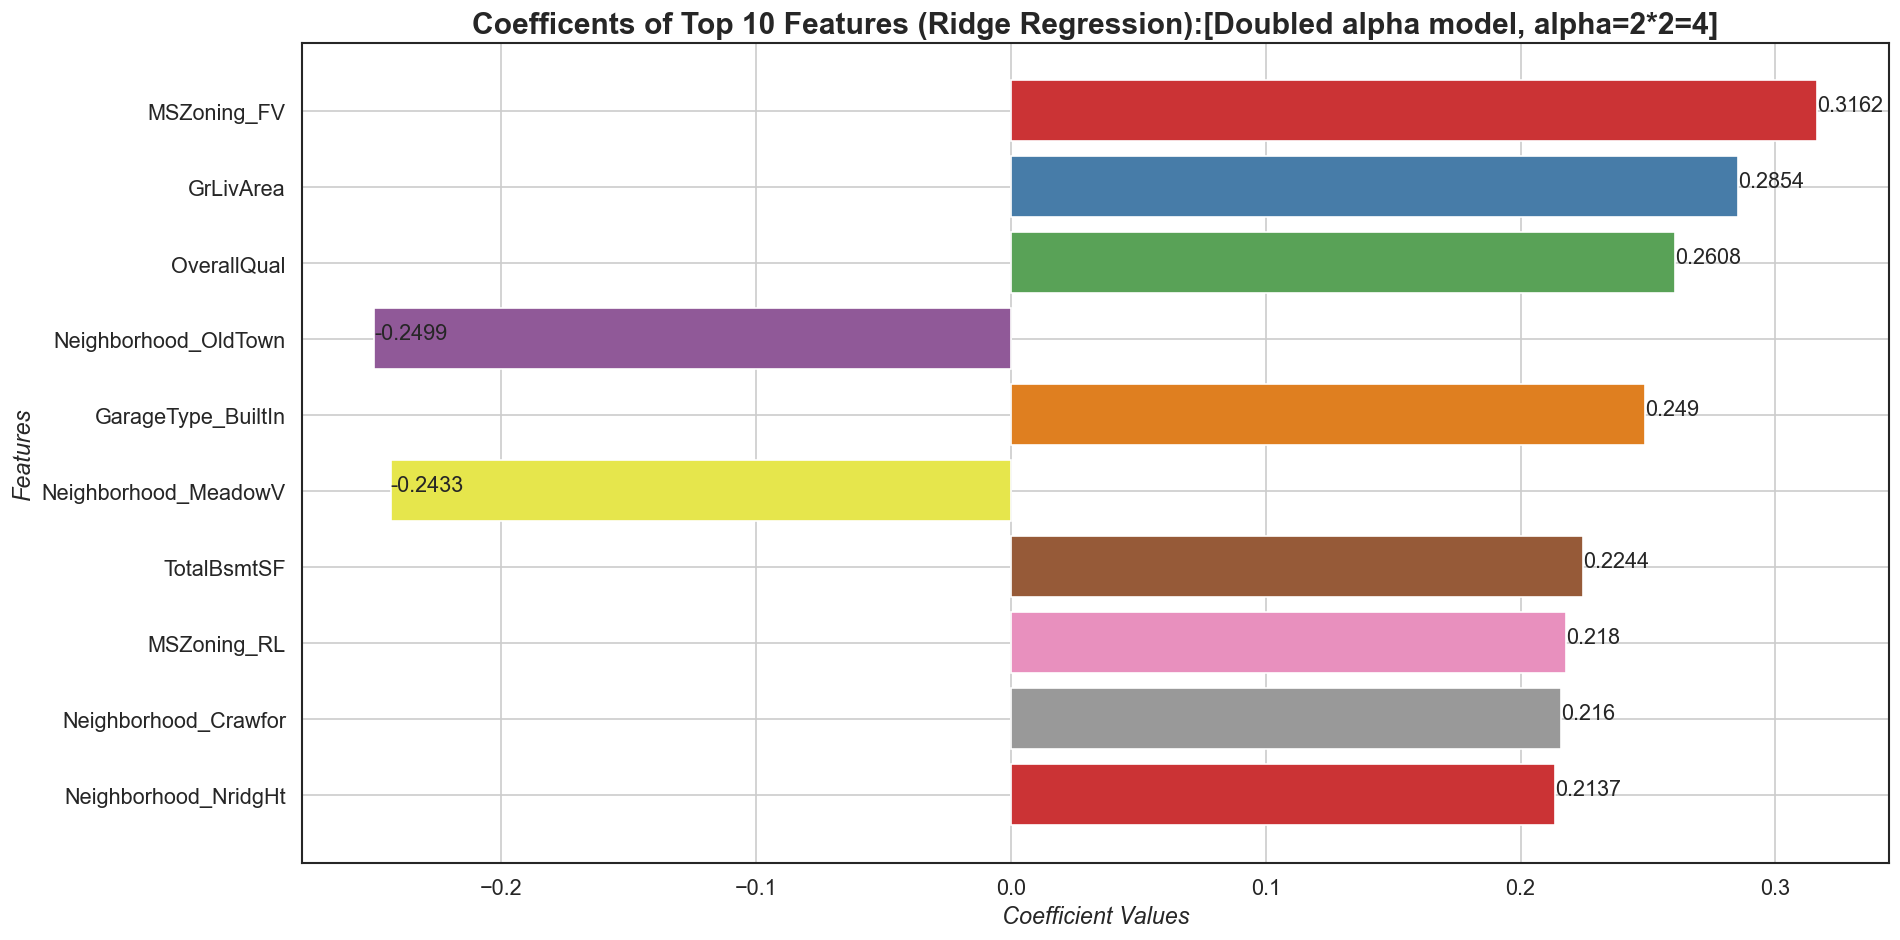

In [103]:
#Coefficient value plot (Ridge Regression)
top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):[Doubled alpha model, alpha=2*2=4]', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [104]:
print("For Ridge Regression (Doubled alpha model, alpha=2*2=4): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=2*2=4): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['MSZoning_FV', 'GrLivArea', 'OverallQual', 'Neighborhood_OldTown', 'GarageType_BuiltIn', 'Neighborhood_MeadowV', 'TotalBsmtSF', 'MSZoning_RL', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt'] 
 *****************************************************************************************************************************


#### Lasso Regression Model

In [105]:
#Checking the outcome: coefficient values with double the value of alpha = 0.002*2 = 0.004 (For Lasso Regression)
lasso = Lasso(alpha=0.004)       
lasso.fit(x_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)

Intercept:  -0.41406254611645915
Coefficients:
  [ 0.07382339  0.29917599  0.10752014 -0.12511281  0.22534363  0.28984156
  0.14378909 -0.08655439  0.12196058  0.15167348  0.17019313 -0.
  0.14915069 -0.05264332 -0.          0.14215737 -0.03852209 -0.0038183
 -0.         -0.          0.          0.08761663 -0.16314479 -0.
  0.          0.          0.         -0.          0.         -0.
  0.          0.06160524  0.         -0.          0.         -0.00626648
 -0.07578027 -0.          0.          0.         -0.         -0.
 -0.         -0.00663581  0.1635057   0.          0.09910421  0.
  0.09178313 -0.        ]


In [106]:
#RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso.predict(x_train)
y_pred_test_l = lasso.predict(x_test)

#R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

#Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

#Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

#Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.002*2 = 0.004)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model: (Doubled alpha model: alpha:0.002*2 = 0.004)
 ****************************************

For Train Set:
R2 score: 0.9034800767367714 
MSE score: 0.09651992326322859 
MAE score: 0.22108183863993736 
RMSE score: 0.3106765573119874

For Test Set:
R2 score: 0.882621176225094 
MSE score: 0.12631879364873796 
MAE score: 0.2552837418575564 
RMSE score: 0.35541355298966576 
 ****************************************


In [107]:
#Creating a dataframe of features and coefficients
lasso_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,OverallQual,0.2992,0.2992
1,GrLivArea,0.2898,0.2898
2,TotalBsmtSF,0.2253,0.2253
3,MSZoning_FV,0.1702,0.1702
4,Foundation_PConc,0.1635,0.1635
5,Neighborhood_OldTown,-0.1631,0.1631
6,d_SaleCondition,0.1517,0.1517
7,MSZoning_RL,0.1492,0.1492
8,GarageCars,0.1438,0.1438
9,Neighborhood_Crawfor,0.1422,0.1422


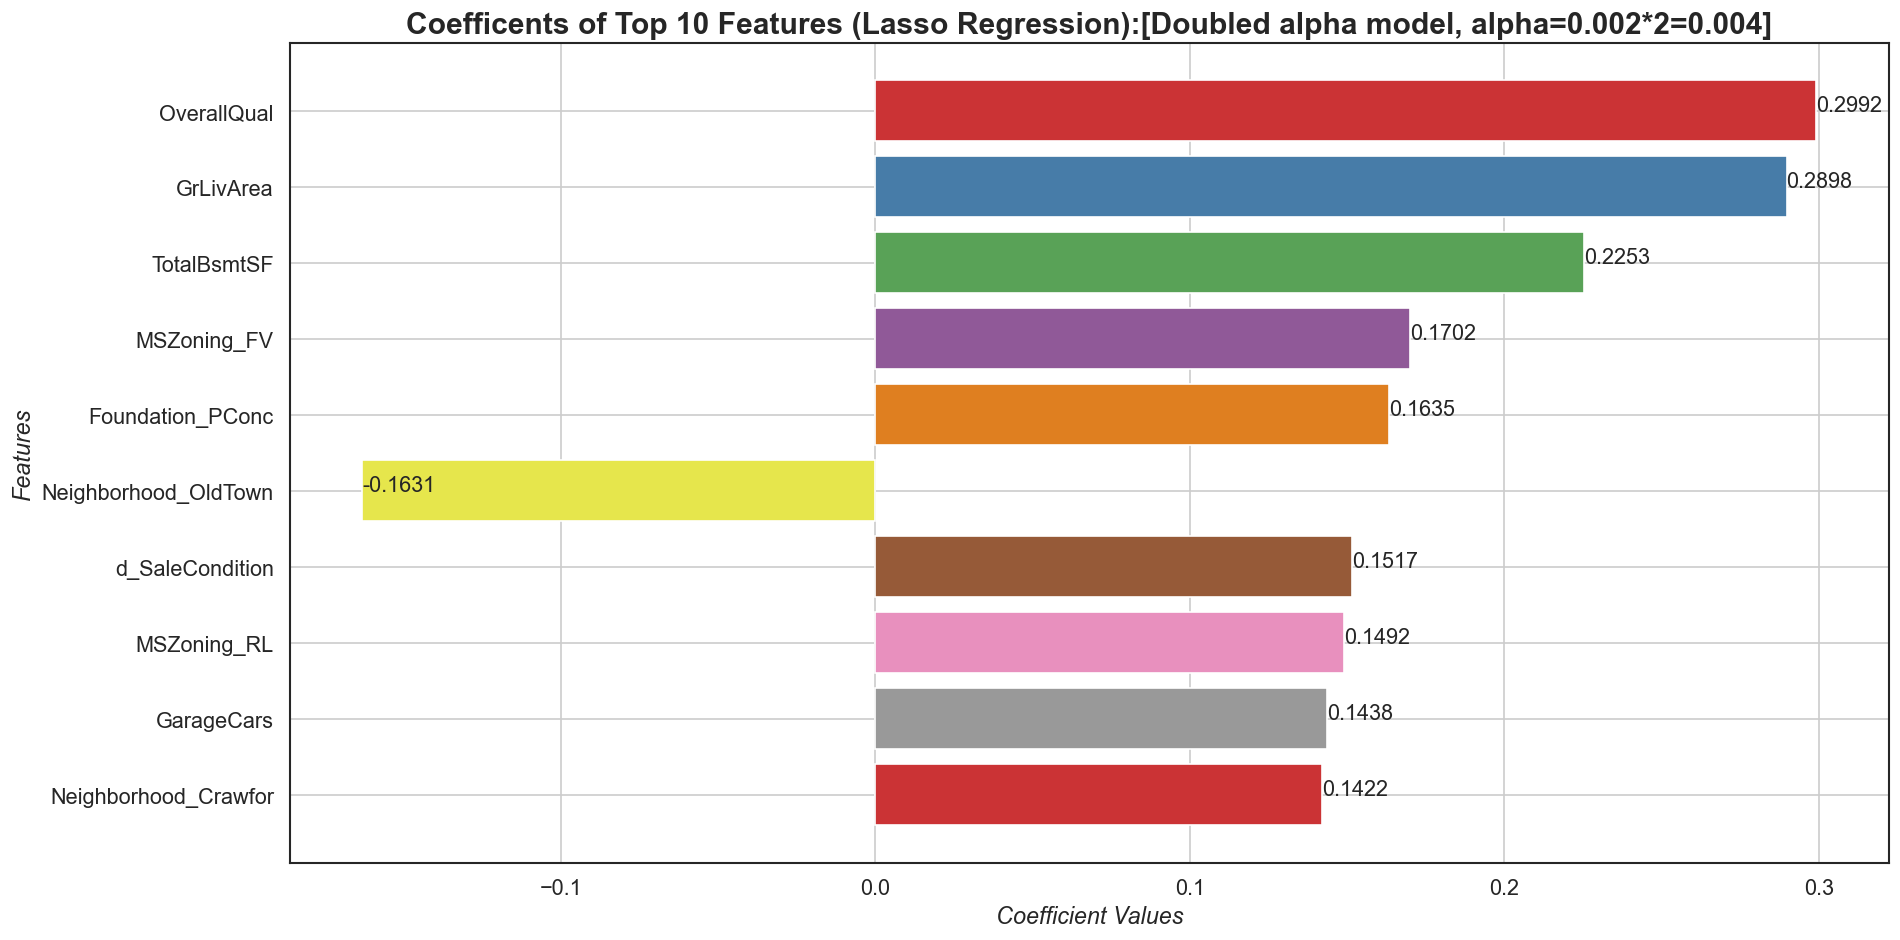

In [108]:
#Coefficient value plot (Lasso Regression)
top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):[Doubled alpha model, alpha=0.002*2=0.004]', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [109]:
print("For Lasso Regression (Doubled alpha model: alpha:0.002*2 = 0.004): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_lasso_df['Features']),"\n", "*"*125)

For Lasso Regression (Doubled alpha model: alpha:0.002*2 = 0.004): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'MSZoning_FV', 'Foundation_PConc', 'Neighborhood_OldTown', 'd_SaleCondition', 'MSZoning_RL', 'GarageCars', 'Neighborhood_Crawfor'] 
 *****************************************************************************************************************************


#### Question2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Please find the answer for question2 in pdf

#### Question3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [110]:
#From Original Lasso Regression Model, import 'top5_original_lasso_features': Top5 features
print("Top 5 features in original lasso model (dropped):\n", top5_org_lasso_features)
df= Housing1

##Removing these top5 features (as per Original Lasso Model) from 'df'
df= df.drop(top5_org_lasso_features, axis=1)
df.head()

Top 5 features in original lasso model (dropped):
 ['MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_RH', 'Neighborhood_MeadowV']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247694,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109011,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317167,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849398,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429216,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [111]:
#Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    Housing_bi = df.copy()
    dualsvcol = (Housing_bi.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)

#### Train Test Split

In [112]:
#Split into train and test
np.random.seed(0)
df_train, df_test = train_test_split(Housing, train_size=0.7, test_size = 0.3, random_state=100)

#### Feature Scaling

In [113]:
#Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

#Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

#StandardScaler
all_cols =df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler fit_transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [114]:
#Storing target variable to y_train and y_test respectively
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [115]:
#Storing all feature variables to X_train and X_test
x_train = df_train.drop('SalePrice',axis=1)
x_test = df_test.drop('SalePrice',axis=1)

#### Recursive Feature Elimination

In [116]:
#Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [117]:
#my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(x_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('MSSubClass', False, 55),
 ('LotFrontage', False, 40),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 61),
 ('BsmtFinSF1', False, 30),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 34),
 ('2ndFlrSF', False, 35),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 27),
 ('FullBath', False, 48),
 ('HalfBath', False, 39),
 ('BedroomAbvGr', False, 62),
 ('Fireplaces', False, 29),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 37),
 ('OpenPorchSF', False, 33),
 ('BuiltOrRemodelAge', True, 1),
 ('d_LotShape', False, 60),
 ('d_ExterQual', False, 57),
 ('d_BsmtQual', False, 7),
 ('d_BsmtExposure', False, 32),
 ('d_BsmtFinType1', False, 36),
 ('d_HeatingQC', False, 23),
 ('d_KitchenQual', False, 9),
 ('d_FireplaceQu', False, 51),
 ('d_GarageFinish', False, 24),
 ('d_BldgType', False, 5),
 ('d_HouseStyle', False, 41),
 ('d_Fence', False, 56),
 ('d_LotConfig', False, 54),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', 

In [118]:
#Checking columns that have RFE support
col_rfe_sup = x_train.columns[rfe.support_]
col_rfe_sup

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'BuiltOrRemodelAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'IsRemodelled', 'OldOrNewGarage', 'd_SaleCondition', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       

In [119]:
#Creating a dataframe for RFE supported top 50 indepedent variables. 
top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking']) # assign the 50 features selected using RFE to a dataframe and view them
top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)
top50_df

,Features,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtUnfSF,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,GarageCars,True,1
7,BuiltOrRemodelAge,True,1
8,MSZoning_FV,True,1
9,MSZoning_RH,True,1


In [120]:
#Let's Assign top 50 columns to X_train_rfe
x_train_rfe = x_train[col_rfe_sup]

In [121]:
#Making sure that we have only 50 features (supported by RFE) in x_train and x_test for further analysis
x_train = x_train_rfe[x_train_rfe.columns]
x_test =  x_test[x_train.columns]

#### Model Building: Lasso Regression Model

In [122]:
#Lasso Regression Model Building
lasso = Lasso()

#List of alphas (lambda parameter)
params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
# Displaying the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0001,-0.206208,-0.219315,1
0,0.00001,-0.205731,-0.219328,2
2,0.0002,-0.206840,-0.219433,3
3,0.0003,-0.207257,-0.219607,4
4,0.0004,-0.207592,-0.219738,5
5,0.0005,-0.207956,-0.220006,6
6,0.0006,-0.208346,-0.220362,7
7,0.0007,-0.208795,-0.220988,8
8,0.0008,-0.209291,-0.221436,9
9,0.0009,-0.209803,-0.221806,10


Focusing on smaller alpha values based on above data

In [124]:
#Plotting a magnified graph for a lower range of alpha.
lasso = Lasso()

#List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)
params_2 = {'alpha': [0.00001, 0.00009, 0.00005, 0.00003, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02, 0.05]}

#Cross-Validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 5e-05, 3e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
#ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.00005,-0.205931,-0.219293,1
1,0.00009,-0.206149,-0.219301,2
3,0.00003,-0.205828,-0.219306,3
4,0.0001,-0.206208,-0.219315,4
0,0.00001,-0.205731,-0.219328,5
5,0.0002,-0.206840,-0.219433,6
6,0.0003,-0.207257,-0.219607,7
7,0.0004,-0.207592,-0.219738,8
8,0.0005,-0.207956,-0.220006,9
9,0.0006,-0.208346,-0.220362,10


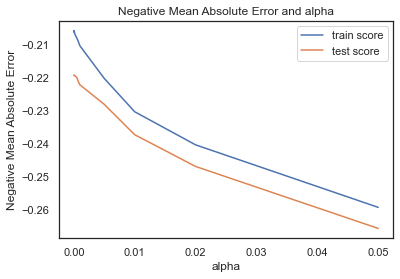

In [126]:
#Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [127]:
# Getting the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=5e-05)

In [128]:
# Checking the coefficient values with (lambda) alpha = 0.0004
lasso = Lasso(alpha=0.0004)      
lasso.fit(x_train, y_train) 
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  -0.37922536439810073
Coefficients:
 [ 0.08597282  0.25016036  0.11368456 -0.12011271  0.2277881   0.29227304
  0.12418289 -0.09644667  0.18556819  0.06789647  0.30341997  0.19079905
 -0.08355912  0.13570951  0.15189227  0.08948103  0.27379315 -0.09861449
 -0.08573332  0.15306943  0.25545469 -0.16512009  0.20279812  0.00683513
  0.03763605  0.          0.          0.          0.16204073 -0.
 -0.016219   -0.          0.1756367  -0.19711854 -0.14372843  0.05061039
 -0.          0.          0.         -0.16881287  0.1621625   0.0505285
 -0.12088718  0.18193231  0.          0.2398779   0.20465197  0.17460744
  0.26894551  0.1012626 ]


In [129]:
#Creating a dataframe of features and coefficients
lasso_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})

#Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(5)  #New Top5 features display (Lasso Model: Reiterated)

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,MSZoning_RL,0.3034,0.3034
1,GrLivArea,0.2923,0.2923
2,Neighborhood_Crawfor,0.2738,0.2738
3,GarageType_BuiltIn,0.2689,0.2689
4,Neighborhood_NridgHt,0.2555,0.2555


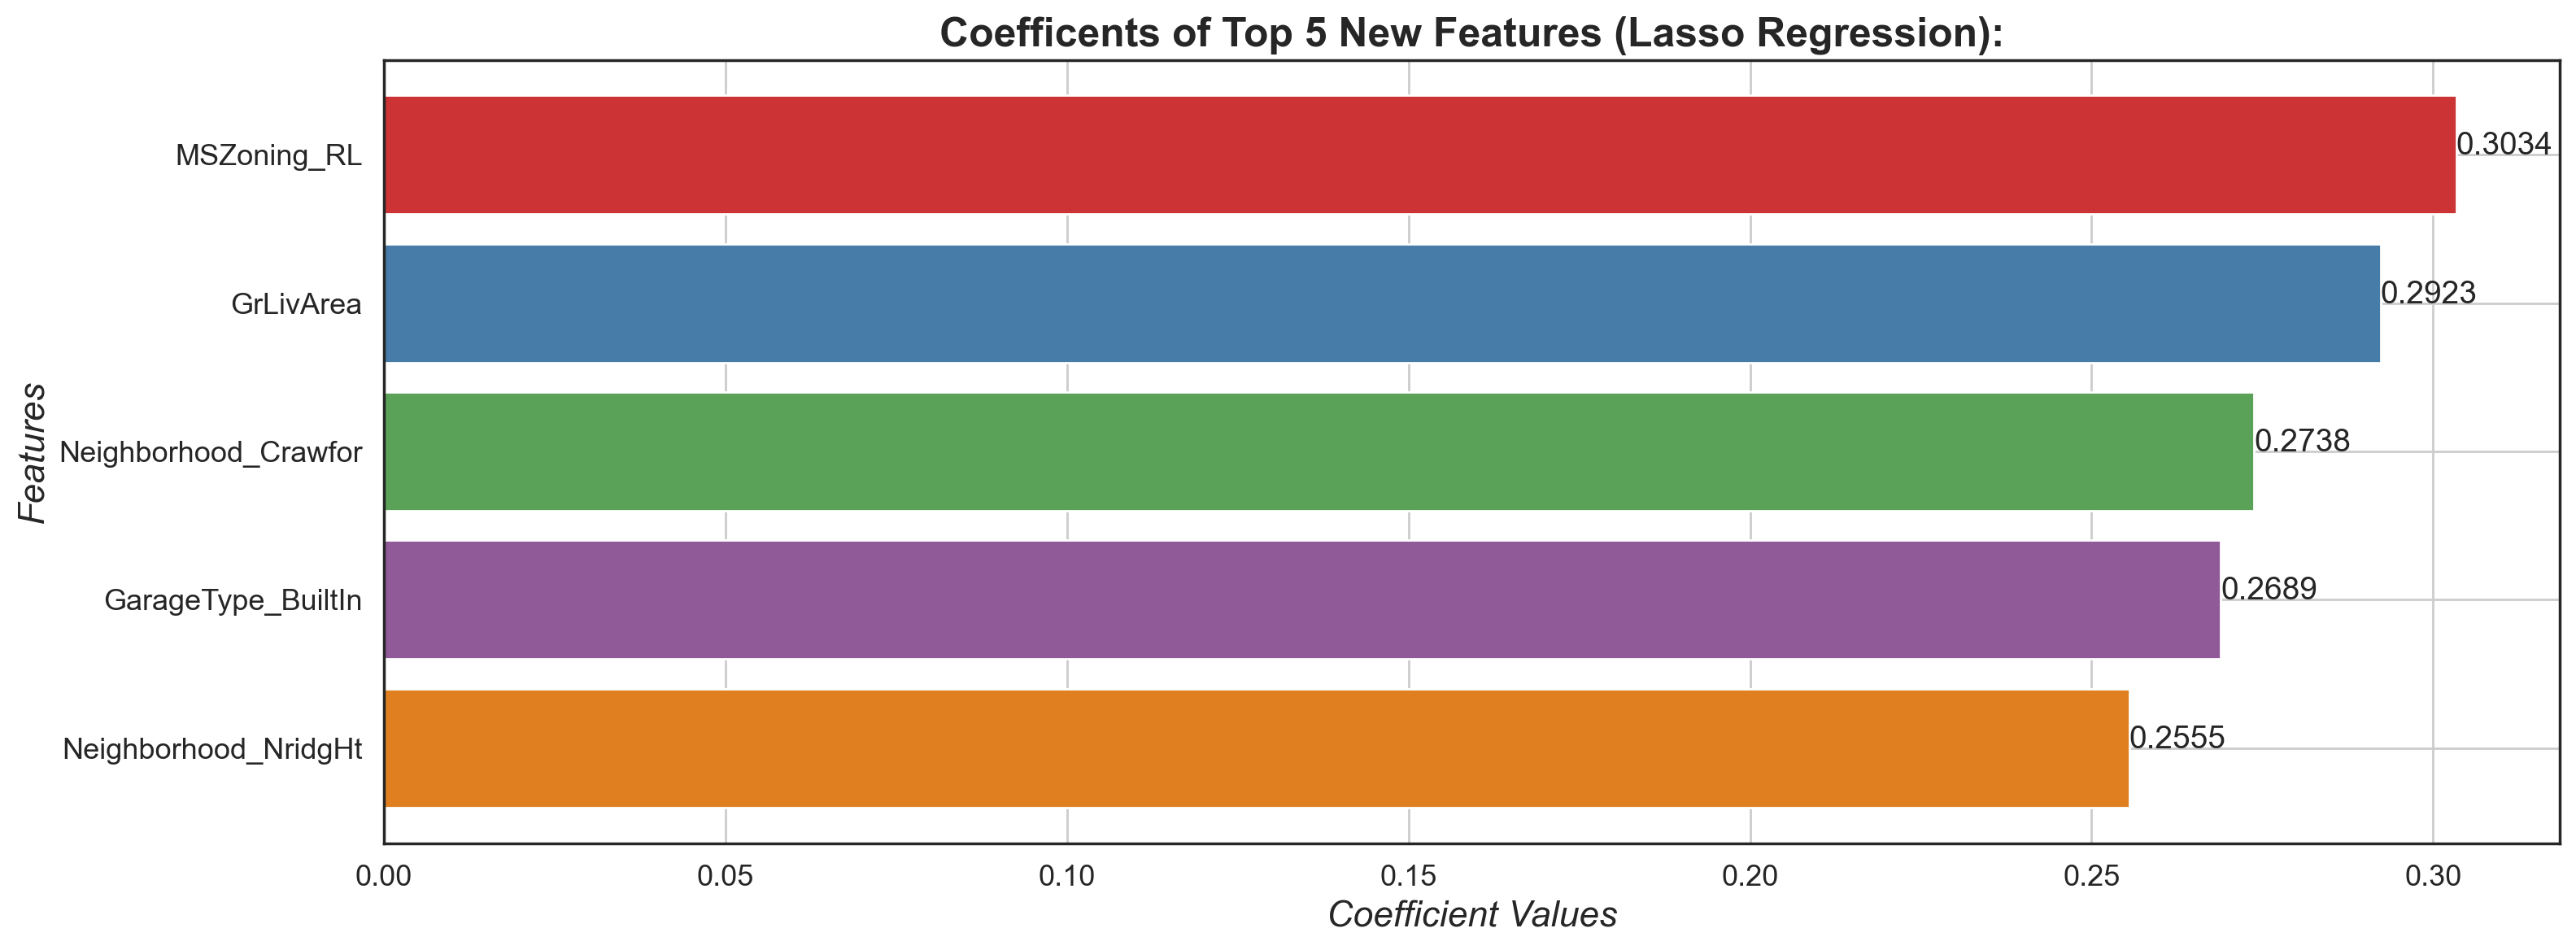

In [130]:
#Coefficient value plot (Lasso Regression)
top5_lasso_df= lasso_df.loc[:4] #'top5_lasso_df' datafram with top 5 features from the new model

sns.set(style='white')
plt.figure(figsize=(16,6), dpi=200)
ax4= sns.barplot(y=top5_lasso_df['Features'], x=top5_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 16, fontstyle='italic')
plt.ylabel('Features' , fontsize= 16, fontstyle='italic')
plt.title('Coefficents of Top 5 New Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top5_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=14)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [131]:
print("For New Lasso Regression Model (After eliminating the top5 features from the original model):\n","*"*125)
print("The top5 new most important predictor variables are as follows:\n\n",\
      list(top5_lasso_df['Features']),"\n", "*"*125)

For New Lasso Regression Model (After eliminating the top5 features from the original model):
 *****************************************************************************************************************************
The top5 new most important predictor variables are as follows:

 ['MSZoning_RL', 'GrLivArea', 'Neighborhood_Crawfor', 'GarageType_BuiltIn', 'Neighborhood_NridgHt'] 
 *****************************************************************************************************************************


#### Question4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

#### Please find the answer for question2 in pdf